IRIS Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


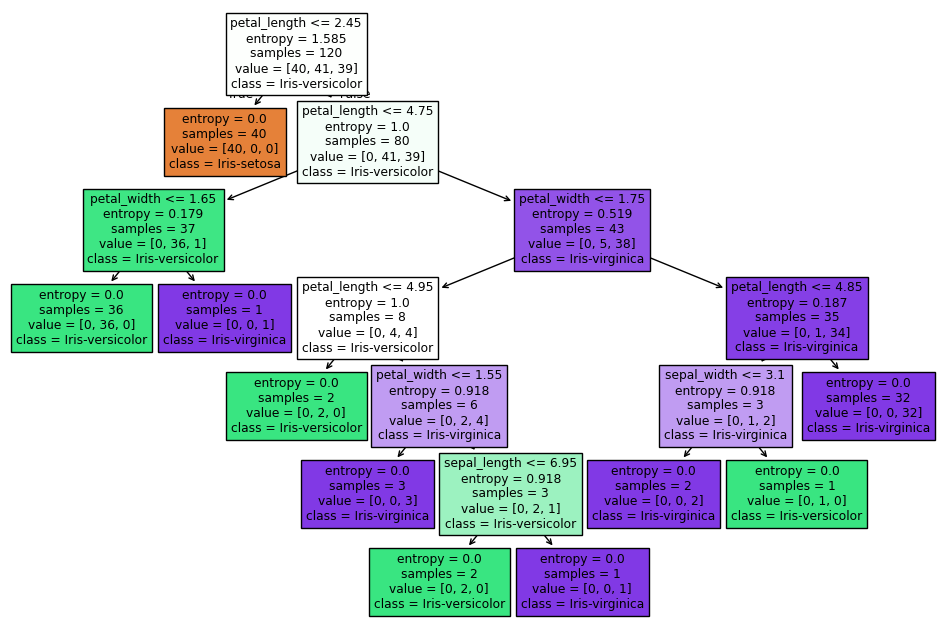


Drug Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


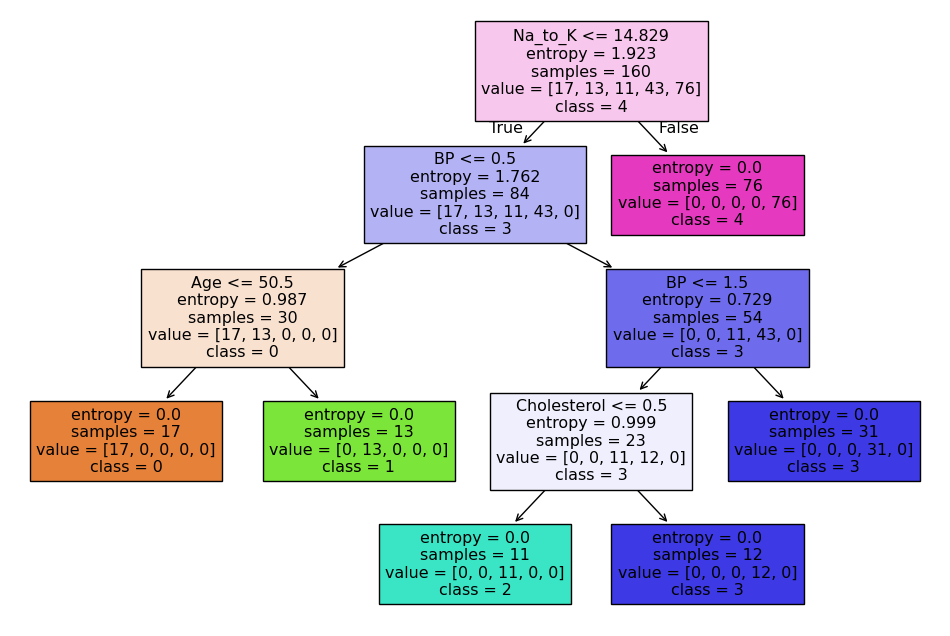

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load and process the IRIS dataset
iris = pd.read_csv("/content/iris.csv")
X_iris = iris.iloc[:, :-1]  # Features
y_iris = iris.iloc[:, -1]   # Target

# Encode target labels
label_encoder_iris = LabelEncoder()
y_iris = label_encoder_iris.fit_transform(y_iris)

# Split the dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train the DecisionTree model
clf_iris = DecisionTreeClassifier(criterion='entropy')
clf_iris.fit(X_train_iris, y_train_iris)

# Predict and evaluate
y_pred_iris = clf_iris.predict(X_test_iris)
print("IRIS Dataset:")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_iris, filled=True, feature_names=X_iris.columns, class_names=label_encoder_iris.classes_)
plt.show()

# Load and process the Drug dataset
drug = pd.read_csv("drug.csv")
X_drug = drug.iloc[:, :-1]  # Features
y_drug = drug.iloc[:, -1]   # Target

# Encode categorical features and target
label_encoders = {}
for column in X_drug.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_drug[column] = le.fit_transform(X_drug[column])
    label_encoders[column] = le

y_drug = LabelEncoder().fit_transform(y_drug)

# Split the dataset
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Train the DecisionTree model
clf_drug = DecisionTreeClassifier(criterion='entropy')
clf_drug.fit(X_train_drug, y_train_drug)

# Predict and evaluate
y_pred_drug = clf_drug.predict(X_test_drug)
print("\nDrug Dataset:")
print("Accuracy:", accuracy_score(y_test_drug, y_pred_drug))
print("Confusion Matrix:\n", confusion_matrix(y_test_drug, y_pred_drug))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_drug, filled=True, feature_names=X_drug.columns, class_names=[str(i) for i in set(y_drug)])
plt.show()


Mean Absolute Error (MAE): 94.3
Mean Squared Error (MSE): 17347.7
Root Mean Squared Error (RMSE): 131.7106677532234


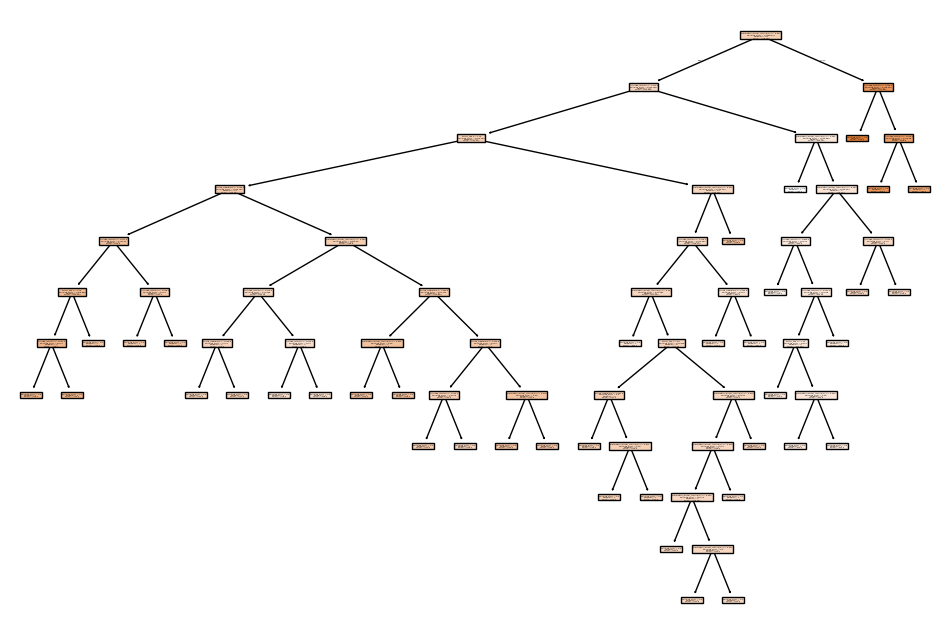

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
petrol_data = pd.read_csv("petrol_consumption.csv")

# Split features and target
X = petrol_data.iloc[:, :-1]  # Features
y = petrol_data.iloc[:, -1]   # Target (Petrol Consumption)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Regression Tree model
regressor = DecisionTreeRegressor(criterion='squared_error', random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()
